In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [6]:
df = pd.read_csv("fake_job_postings.csv", index_col="job_id")
df.head()

title            location  \
job_id                                                                  
1                                Marketing Intern    US, NY, New York   
2       Customer Service - Cloud Video Production      NZ, , Auckland   
3         Commissioning Machinery Assistant (CMA)       US, IA, Wever   
4               Account Executive - Washington DC  US, DC, Washington   
5                             Bill Review Manager  US, FL, Fort Worth   

       department salary_range  \
job_id                           
1       Marketing          NaN   
2         Success          NaN   
3             NaN          NaN   
4           Sales          NaN   
5             NaN          NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3       Valor Services provides Workforce Solutions th...   
4       Our passion for improving quality of life thro...   
5       SpotSource Solutions LLC is a Global Human Cap...   

                                              description  \
job_id                                                      
1       Food52, a fast-growing, James Beard Award-winn...   
2       Organised - Focused - Vibrant - Awesome!Do you...   
3       Our client, located in Houston, is actively se...   
4       THE COMPANY: ESRI – Environmental Systems Rese...   
5       JOB TITLE: Itemization Review ManagerLOCATION:...   

                                             requirements  \
job_id                                                      
1       Experience with content management systems a m...   
2       What we expect from you:Your key responsibilit...   
3       Implement pre-commissioning and commissioning ...   
4       EDUCATION: Bachelor’s or Master’s in GIS, busi...   
5       QUALIFICATIONS:RN license in the State of Texa...   

                                                 benefits  telecommuting  \
job_id                                                                     
1                                                     NaN              0   
2       What you will get from usThrough being part of...              0   
3                                                     NaN              0   
4       Our culture is anything but corporate—we have ...              0   
5                                   Full Benefits Offered              0   

        has_company_logo  has_questions employment_type required_experience  \
job_id                                                                        
1                      1              0           Other          Internship   
2                      1              0       Full-time      Not Applicable   
3                      1              0             NaN                 NaN   
4                      1              0       Full-time    Mid-Senior level   
5                      1              1       Full-time    Mid-Senior level   

       required_education                   industry              function  \
job_id                                                                       
1                     NaN                        NaN             Marketing   
2                     NaN  Marketing and Advertising      Customer Service   
3                     NaN                        NaN                   NaN   
4       Bachelor's Degree          Computer Software                 Sales   
5       Bachelor's Degree     Hospital & Health Care  Health Care Provider   

        fraudulent  
job_id              
1                0  
2                0  
3                0  
4                0  
5                0

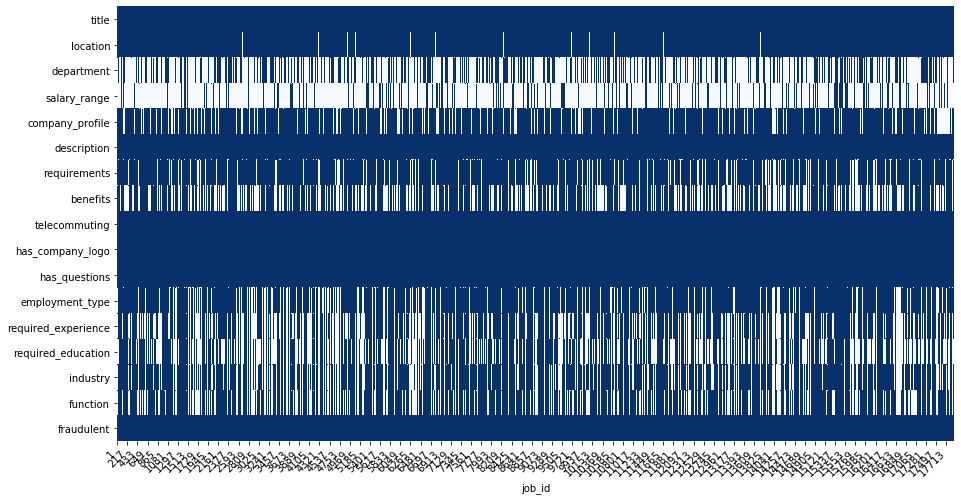

In [7]:
plot_missing_value(df)

In [38]:
df.location.value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
PL, , krakow               1
US, MN, Faribault          1
US, , pittsburgh           1
US, CA, Palo Alto,         1
US, WI, Spooner            1
Name: location, Length: 3105, dtype: int64

In [39]:
df.location.isna().sum()

346

In [40]:
df.department.isna().sum()

11547

In [60]:
df.drop(columns="department", inplace=True)

In [43]:
df.salary_range.isna().sum()

15012

In [58]:
df.drop(columns="salary_range", inplace=True)

In [45]:
df.company_profile.isna().sum()

3308

In [46]:
df.company_profile.notna().sum()

14572

In [54]:
df.company_profile = df.company_profile.notnull().astype('int')

In [55]:
df.company_profile.value_counts()

1    14572
0     3308
Name: company_profile, dtype: int64

In [56]:
df.description = df.description.notnull().astype('int')
df.requirements = df.requirements.notnull().astype('int')
df.benefits = df.benefits.notnull().astype('int')

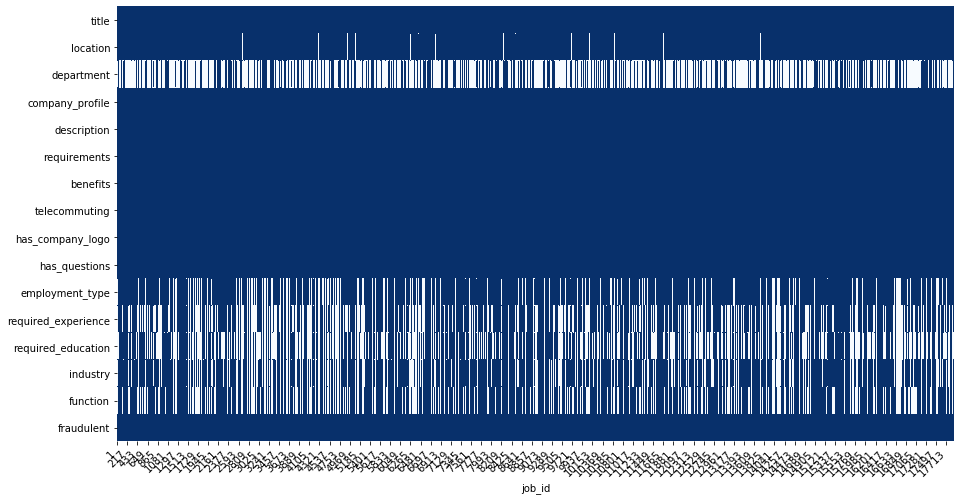

In [59]:
plot_missing_value(df)

In [61]:
df

title  \
job_id                                                      
1                                        Marketing Intern   
2               Customer Service - Cloud Video Production   
3                 Commissioning Machinery Assistant (CMA)   
4                       Account Executive - Washington DC   
5                                     Bill Review Manager   
...                                                   ...   
17876                    Account Director - Distribution    
17877                                  Payroll Accountant   
17878   Project Cost Control Staff Engineer - Cost Con...   
17879                                    Graphic Designer   
17880                          Web Application Developers   

                    location  company_profile  description  requirements  \
job_id                                                                     
1           US, NY, New York                1            1             1   
2             NZ, , Auckland                1            1             1   
3              US, IA, Wever                1            1             1   
4         US, DC, Washington                1            1             1   
5         US, FL, Fort Worth                1            1             1   
...                      ...              ...          ...           ...   
17876        CA, ON, Toronto                1            1             1   
17877   US, PA, Philadelphia                1            1             1   
17878        US, TX, Houston                1            1             1   
17879          NG, LA, Lagos                0            1             1   
17880      NZ, N, Wellington                1            1             1   

        benefits  telecommuting  has_company_logo  has_questions  \
job_id                                                             
1              0              0                 1              0   
2              1              0                 1              0   
3              0              0                 1              0   
4              1              0                 1              0   
5              1              0                 1              1   
...          ...            ...               ...            ...   
17876          1              0                 1              1   
17877          1              0                 1              1   
17878          0              0                 0              0   
17879          1              0                 0              1   
17880          0              0                 1              1   

       employment_type required_experience required_education  \
job_id                                                          
1                Other          Internship                NaN   
2            Full-time      Not Applicable                NaN   
3                  NaN                 NaN                NaN   
4            Full-time    Mid-Senior level  Bachelor's Degree   
5            Full-time    Mid-Senior level  Bachelor's Degree   
...                ...                 ...                ...   
17876        Full-time    Mid-Senior level                NaN   
17877        Full-time    Mid-Senior level  Bachelor's Degree   
17878        Full-time                 NaN                NaN   
17879         Contract      Not Applicable       Professional   
17880        Full-time    Mid-Senior level                NaN   

                         industry              function  fraudulent  
job_id                                                               
1                             NaN             Marketing           0  
2       Marketing and Advertising      Customer Service           0  
3                             NaN                   NaN           0  
4               Computer Software                 Sales           0  
5          Hospital & Health Care  Health Care Provider           0  
...                           ...               

In [62]:
df.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [63]:
df.employment_type.isna().sum()

3471

In [64]:
df.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [65]:
df.required_experience.isna().sum()

7050

In [66]:
df.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [68]:
df.required_education.isna().sum()

8105

In [69]:
df.required_education.fillna(value="Unspecified", inplace=True)

In [72]:
df.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Ranching                                  1
Museums and Institutions                  1
Alternative Dispute Resolution            1
Shipbuilding                              1
Wine and Spirits                          1
Name: industry, Length: 131, dtype: int64

In [73]:
df.industry.isna().sum()

4903

In [74]:
df.function.value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Art/Creative               132
Writing/Editing            132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [75]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [82]:
df.telecommuting.value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

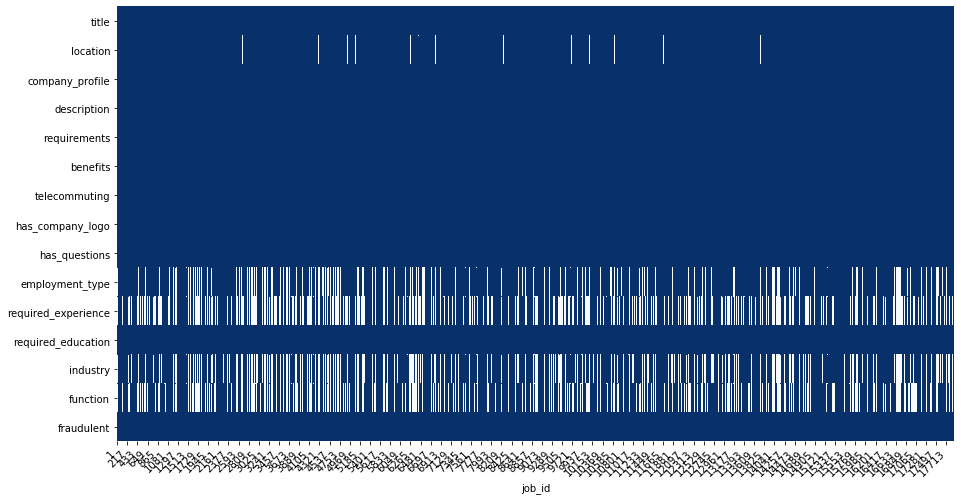

In [76]:
plot_missing_value(df)

In [77]:
X = df.drop(columns="fraudulent")
y = df.fraudulent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14304, 14), (3576, 14), (14304,), (3576,))

# using auto ML

In [80]:
from jcopml.automl import AutoRegressor

In [81]:
df

title  \
job_id                                                      
1                                        Marketing Intern   
2               Customer Service - Cloud Video Production   
3                 Commissioning Machinery Assistant (CMA)   
4                       Account Executive - Washington DC   
5                                     Bill Review Manager   
...                                                   ...   
17876                    Account Director - Distribution    
17877                                  Payroll Accountant   
17878   Project Cost Control Staff Engineer - Cost Con...   
17879                                    Graphic Designer   
17880                          Web Application Developers   

                    location  company_profile  description  requirements  \
job_id                                                                     
1           US, NY, New York                1            1             1   
2             NZ, , Auckland                1            1             1   
3              US, IA, Wever                1            1             1   
4         US, DC, Washington                1            1             1   
5         US, FL, Fort Worth                1            1             1   
...                      ...              ...          ...           ...   
17876        CA, ON, Toronto                1            1             1   
17877   US, PA, Philadelphia                1            1             1   
17878        US, TX, Houston                1            1             1   
17879          NG, LA, Lagos                0            1             1   
17880      NZ, N, Wellington                1            1             1   

        benefits  telecommuting  has_company_logo  has_questions  \
job_id                                                             
1              0              0                 1              0   
2              1              0                 1              0   
3              0              0                 1              0   
4              1              0                 1              0   
5              1              0                 1              1   
...          ...            ...               ...            ...   
17876          1              0                 1              1   
17877          1              0                 1              1   
17878          0              0                 0              0   
17879          1              0                 0              1   
17880          0              0                 1              1   

       employment_type required_experience required_education  \
job_id                                                          
1                Other          Internship        Unspecified   
2            Full-time      Not Applicable        Unspecified   
3                  NaN                 NaN        Unspecified   
4            Full-time    Mid-Senior level  Bachelor's Degree   
5            Full-time    Mid-Senior level  Bachelor's Degree   
...                ...                 ...                ...   
17876        Full-time    Mid-Senior level        Unspecified   
17877        Full-time    Mid-Senior level  Bachelor's Degree   
17878        Full-time                 NaN        Unspecified   
17879         Contract      Not Applicable       Professional   
17880        Full-time    Mid-Senior level        Unspecified   

                         industry              function  fraudulent  
job_id                                                               
1                             NaN             Marketing           0  
2       Marketing and Advertising      Customer Service           0  
3                             NaN                   NaN           0  
4               Computer Software                 Sales           0  
5          Hospital & Health Care  Health Care Provider           0  
...                           ...               

In [87]:
model_auto = AutoClassifier([], ["title", "location", "company_profile", "description",
                            "requirements", "benefits", "telecommuting", "has_company_logo",
                            "has_questions", "employment_type", "required_experience", "required_education", 
                             "industry", "function"])

In [88]:
model_auto.fit(X, y, cv=5, n_trial=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 13.5min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


================== Best Model Info ==================
algo                      | SVC
algo__C                   | 1.368979599359222
algo__gamma               | 0.36749049453053273

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=True, n_neighbors=5)

=========== Score ===========
Train: 1.0
Valid: 0.979795978226597
Test : 0.9815436241610739


# Imbalance dataset (tidak bisa digunakan dengan automl)

In [89]:
df.fraudulent.value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

# Try Using SVC

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [102]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile", "description",
                            "requirements", "benefits", "telecommuting", "has_company_logo",
                            "has_questions", "employment_type", "required_experience", "required_education", 
                             "industry", "function"]),])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model_SVC_W = GridSearchCV(pipeline, gsp.svm_params, cv=5, n_jobs=-1, verbose=1)
model_SVC_W.fit(X_train, y_train)

print(model_SVC_W.best_params_)
print(model_SVC_W.score(X_train, y_train), model_SVC_W.best_score_, model_SVC_W.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.7min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 10.0, 'algo__gamma': 0.1}
1.0 0.9797260481566669 0.9812639821029083


In [104]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile", "description",
                            "requirements", "benefits", "telecommuting", "has_company_logo",
                            "has_questions", "employment_type", "required_experience", "required_education", 
                             "industry", "function"]),])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model_SVC = GridSearchCV(pipeline, gsp.svm_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
model_SVC.fit(X_train, y_train)

print(model_SVC.best_params_)
print(model_SVC.score(X_train, y_train), model_SVC.best_score_, model_SVC.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.7min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 10.0, 'algo__gamma': 0.1}
1.0 0.7752251202933771 0.7999999999999998


In [92]:
from jcopml.feature_importance import mean_loss_decrease, mean_score_decrease

feature  importance     stdev
1              location    0.122072  0.006332
0                 title    0.106675  0.004389
2       company_profile    0.101671  0.008888
13             function    0.071546  0.003974
12             industry    0.058370  0.002631
7      has_company_logo    0.041440  0.001601
8         has_questions    0.029180  0.001895
9       employment_type    0.027511  0.001697
11   required_education    0.026872  0.002359
10  required_experience    0.016798  0.001327
5              benefits    0.009185  0.000837
6         telecommuting    0.005469  0.000354
4          requirements    0.004742  0.001325
3           description    0.000000  0.000000

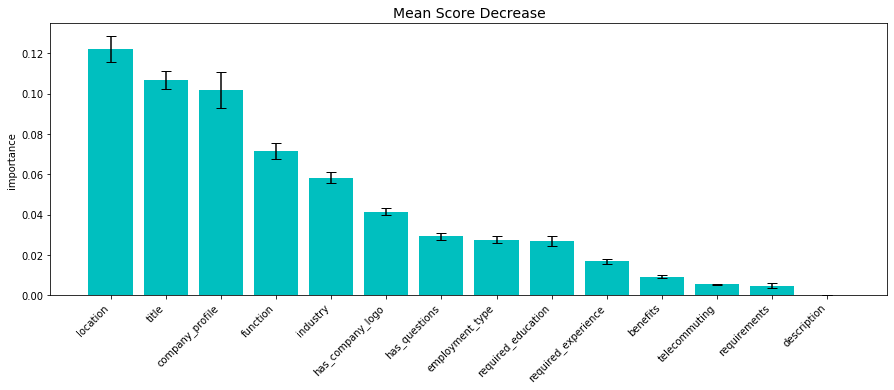

In [93]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

# Try using random tree

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [95]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile", "description",
                            "requirements", "benefits", "telecommuting", "has_company_logo",
                            "has_questions", "employment_type", "required_experience", "required_education", 
                             "industry", "function"]),])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=5, scoring='f1', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 32.9min finished


{'algo': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=59,
                       max_features=0.737265320016441, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=187, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False), 'algo__max_depth': 59, 'algo__max_features': 0.737265320016441, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187, 'prep__categoric': Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('onehot',
                 OneH

feature  importance     stdev
2       company_profile    0.371207  0.012256
1              location    0.286578  0.010303
0                 title    0.180773  0.001892
7      has_company_logo    0.143150  0.009100
13             function    0.135997  0.005853
12             industry    0.129062  0.005794
8         has_questions    0.055906  0.004493
11   required_education    0.052375  0.008398
9       employment_type    0.051863  0.001898
10  required_experience    0.046592  0.002561
4          requirements    0.033031  0.002336
5              benefits    0.018593  0.002482
6         telecommuting    0.009070  0.001160
3           description    0.000000  0.000000

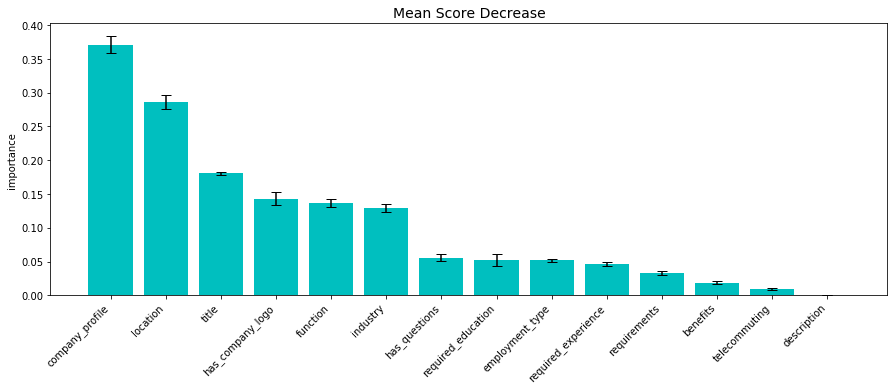

In [96]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

In [101]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile",
                                               "has_company_logo", "has_questions", 
                                               "employment_type", "required_education", 
                                               "industry", "function"]),])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model_SVC = GridSearchCV(pipeline, gsp.svm_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
model_SVC.fit(X_train, y_train)

print(model_SVC.best_params_)
print(model_SVC.score(X_train, y_train), model_SVC.best_score_, model_SVC.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  2.7min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.9992790194664743 0.7519132728435054 0.7098445595854921


feature  importance     stdev
1              location    0.122072  0.006332
0                 title    0.106675  0.004389
2       company_profile    0.101671  0.008888
13             function    0.071546  0.003974
12             industry    0.058370  0.002631
7      has_company_logo    0.041440  0.001601
8         has_questions    0.029180  0.001895
9       employment_type    0.027511  0.001697
11   required_education    0.026872  0.002359
10  required_experience    0.016798  0.001327
5              benefits    0.009185  0.000837
6         telecommuting    0.005469  0.000354
4          requirements    0.004742  0.001325
3           description    0.000000  0.000000

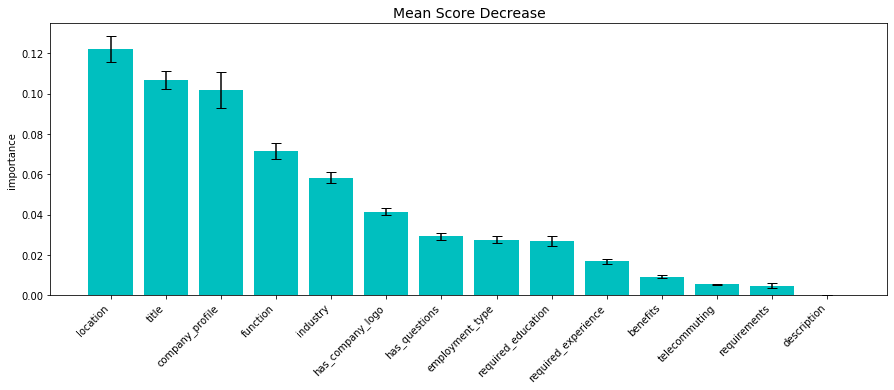

In [105]:
mean_score_decrease(X_train, y_train, model_SVC, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

title  \
job_id                                                      
1                                        Marketing Intern   
2               Customer Service - Cloud Video Production   
3                 Commissioning Machinery Assistant (CMA)   
4                       Account Executive - Washington DC   
5                                     Bill Review Manager   
...                                                   ...   
17876                    Account Director - Distribution    
17877                                  Payroll Accountant   
17878   Project Cost Control Staff Engineer - Cost Con...   
17879                                    Graphic Designer   
17880                          Web Application Developers   

                    location  company_profile  description  requirements  \
job_id                                                                     
1           US, NY, New York                1            1             1   
2             NZ, , Auckland                1            1             1   
3              US, IA, Wever                1            1             1   
4         US, DC, Washington                1            1             1   
5         US, FL, Fort Worth                1            1             1   
...                      ...              ...          ...           ...   
17876        CA, ON, Toronto                1            1             1   
17877   US, PA, Philadelphia                1            1             1   
17878        US, TX, Houston                1            1             1   
17879          NG, LA, Lagos                0            1             1   
17880      NZ, N, Wellington                1            1             1   

        benefits  telecommuting  has_company_logo  has_questions  \
job_id                                                             
1              0              0                 1              0   
2              1              0                 1              0   
3              0              0                 1              0   
4              1              0                 1              0   
5              1              0                 1              1   
...          ...            ...               ...            ...   
17876          1              0                 1              1   
17877          1              0                 1              1   
17878          0              0                 0              0   
17879          1              0                 0              1   
17880          0              0                 1              1   

       employment_type required_experience required_education  \
job_id                                                          
1                Other          Internship        Unspecified   
2            Full-time      Not Applicable        Unspecified   
3                  NaN                 NaN        Unspecified   
4            Full-time    Mid-Senior level  Bachelor's Degree   
5            Full-time    Mid-Senior level  Bachelor's Degree   
...                ...                 ...                ...   
17876        Full-time    Mid-Senior level        Unspecified   
17877        Full-time    Mid-Senior level  Bachelor's Degree   
17878        Full-time                 NaN        Unspecified   
17879         Contract      Not Applicable       Professional   
17880        Full-time    Mid-Senior level        Unspecified   

                         industry              function  fraudulent  
job_id                                                               
1                             NaN             Marketing           0  
2       Marketing and Advertising      Customer Service           0  
3                             NaN                   NaN           0  
4               Computer Software                 Sales           0  
5          Hospital & Health Care  Health Care Provider           0  
...                           ...               

## Remove description, Requirement, benefits

In [108]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile", 
                                               "telecommuting", "has_company_logo",
                                               "has_questions", "employment_type", "required_experience", 
                                               "required_education", "industry", "function"]),])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model_SVC = GridSearchCV(pipeline, gsp.svm_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
model_SVC.fit(X_train, y_train)

print(model_SVC.best_params_)
print(model_SVC.score(X_train, y_train), model_SVC.best_score_, model_SVC.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.1min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 100.0, 'algo__gamma': 0.1}
1.0 0.7634963658752267 0.7964071856287425


feature  importance     stdev
0                 title    0.145440  0.003807
1              location    0.136476  0.010398
2       company_profile    0.065286  0.006462
12             industry    0.062114  0.004290
13             function    0.046523  0.002081
7      has_company_logo    0.039248  0.001498
11   required_education    0.037238  0.003347
8         has_questions    0.028812  0.002584
9       employment_type    0.021756  0.001867
10  required_experience    0.014474  0.001960
6         telecommuting    0.006517  0.000797
3           description    0.000000  0.000000
4          requirements    0.000000  0.000000
5              benefits    0.000000  0.000000

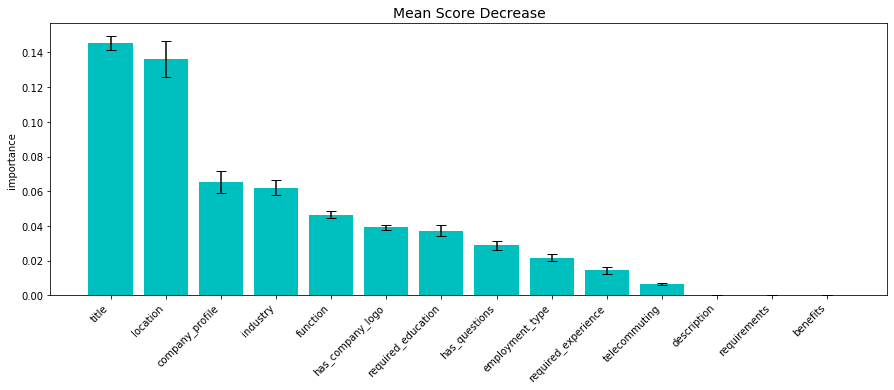

In [109]:
mean_score_decrease(X_train, y_train, model_SVC, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

In [111]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), []),
    ('categoric', cat_pipe(encoder='onehot'), ["title", "location", "company_profile", 
                                               "has_company_logo",
                                               "has_questions", "employment_type", "required_experience", 
                                               "required_education", "industry", "function"]),])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model_SVC = GridSearchCV(pipeline, gsp.svm_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
model_SVC.fit(X_train, y_train)

print(model_SVC.best_params_)
print(model_SVC.score(X_train, y_train), model_SVC.best_score_, model_SVC.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.2min finished
/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.9971223021582735 0.7456188415684213 0.7867867867867867
